# AutoGluon Tabular Regression

##### Uses Autogluon Tabular Regression to build, train, and test a variety of machine learning models to predict the number of casual users from a bike rental usage dataset.
##### 1. Load the dataset and perform basic exploratory data analysis
##### 2. Split the data into training and testing sets
##### 3. Use AutoGluon to train linear regression models
##### 4. Evaluate performance of trained models

## Import required libraries

In [ ]:
!pip install -U pip
!pip install llvmlite
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir --ignore-installed llvmlite

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split

## 1. Load the dataset and perform basic exploratory data analysis

In [104]:
# Read the CSV file 
bike_df = pd.read_csv("bike_sharing_daily.csv")

# Load the top 6 instances
bike_df.head(6)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.518261,0.089565,88,1518,1606


In [105]:
# Obtain dataset information
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


In [106]:
# Drop any rows containing null values
# bike_df = bike_df.dropna()

In [107]:
# Generate statistical summary
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [108]:
# Remove unncessary columns
bike_df = bike_df.drop(['registered', 'cnt', 'instant', 'dteday'], axis=1)

## 2. Split the data into training and testing sets

In [113]:
# Split the data into 80% for training and 20% for testing using train_test_split
X_train, X_test = train_test_split(bike_df, test_size=0.2, random_state=0)

In [114]:
X_train

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual
97,2,0,4,0,5,1,2,0.335833,0.836250,0.226992,172
503,2,1,5,0,5,1,1,0.564167,0.523333,0.136817,1521
642,4,1,10,0,4,1,2,0.657500,0.722917,0.117546,891
498,2,1,5,0,0,0,1,0.612500,0.576250,0.225117,2172
303,4,0,10,0,1,1,1,0.340000,0.703333,0.106350,362
...,...,...,...,...,...,...,...,...,...,...,...
707,4,1,12,0,6,0,2,0.381667,0.911250,0.101379,1153
192,3,0,7,0,2,1,1,0.794167,0.559167,0.200254,662
629,3,1,9,0,5,1,1,0.599167,0.668750,0.154229,1250
559,3,1,7,0,5,1,2,0.731667,0.485833,0.080850,1511


In [115]:
X_test

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual
196,3,0,7,0,6,0,1,0.686667,0.585000,0.208342,2418
187,3,0,7,0,4,1,1,0.750000,0.651250,0.159200,754
14,1,0,1,0,6,0,2,0.233333,0.498750,0.157963,222
31,1,0,2,0,2,1,2,0.192174,0.829565,0.053213,47
390,1,1,1,0,4,1,2,0.341667,0.769583,0.073396,244
...,...,...,...,...,...,...,...,...,...,...,...
566,3,1,7,0,5,1,2,0.665833,0.844167,0.208967,747
688,4,1,11,0,1,1,2,0.380833,0.623333,0.235067,449
266,4,0,9,0,6,0,2,0.606667,0.862500,0.078383,1776
504,2,1,5,0,6,0,1,0.600000,0.456250,0.083975,3410


## 3. Use AutoGluon to train linear regression models

In [116]:
# Train multiple ML regression models using AutoGluon
# Using 'best_quality' preset and R2 metric as evaluation metric
# Label (column to predict) set to 'casual' (count of casual users)

predictor = TabularPredictor(label="casual", problem_type = 'regression', eval_metric = 'r2').fit(train_data = X_train, time_limit = 200, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20231001_104258/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=5, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels/ag-20231001_104258/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Aug 30 17:57:46 UTC 2023
Train Data Rows:    584
Train Data Columns: 10
Label Column: casual
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    879.97 MB
	Train Data (Original)  Memory Usage: 0.05 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: 

# 4. Evaluate performance of trained models

In [117]:
# Output summary of information about models
leaderboard = predictor.leaderboard(silent = True)
leaderboard

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.851812,0.534453,124.252091,0.000802,0.731699,2,True,11
1,CatBoost_BAG_L1,0.844732,0.009235,24.624705,0.009235,24.624705,1,True,6
2,LightGBMXT_BAG_L1,0.842214,0.061128,17.605481,0.061128,17.605481,1,True,3
3,NeuralNetTorch_BAG_L1,0.827873,0.199122,32.766620,0.199122,32.766620,1,True,10
4,LightGBM_BAG_L1,0.824676,0.031501,16.027727,0.031501,16.027727,1,True,4
5,ExtraTreesMSE_BAG_L1,0.819772,0.204675,1.208915,0.204675,1.208915,1,True,7
6,RandomForestMSE_BAG_L1,0.804987,0.293805,1.718550,0.293805,1.718550,1,True,5
7,XGBoost_BAG_L1,0.804843,0.161848,48.514101,0.161848,48.514101,1,True,9
8,NeuralNetFastAI_BAG_L1,0.770146,0.143627,27.983867,0.143627,27.983867,1,True,8
9,KNeighborsUnif_BAG_L1,0.656510,0.102318,0.009485,0.102318,0.009485,1,True,1


In [121]:
print(f"The highest scoring model was: {leaderboard['model'][0]}")

The highest scoring model was: WeightedEnsemble_L2


In [122]:
# Evaluate model using test data set (will use highest scoring model)
predictor.evaluate(X_test)

Evaluation: r2 on test data: 0.8796550710792919
Evaluations on test data:
{
    "r2": 0.8796550710792919,
    "root_mean_squared_error": -252.1716329263925,
    "mean_squared_error": -63590.53245276323,
    "mean_absolute_error": -166.25715774743736,
    "pearsonr": 0.9406402559312953,
    "median_absolute_error": -106.05657958984375
}


{'r2': 0.8796550710792919,
 'root_mean_squared_error': -252.1716329263925,
 'mean_squared_error': -63590.53245276323,
 'mean_absolute_error': -166.25715774743736,
 'pearsonr': 0.9406402559312953,
 'median_absolute_error': -106.05657958984375}

In [128]:
# Get model to predict 'casual' value for test data
y_predict = predictor.predict(X_test)
y_predict

196    2042.479126
187     775.220703
14      200.221359
31      111.770134
390     234.553162
          ...     
566     760.297791
688     414.831696
266    1486.045166
504    2677.829834
239    1687.723267
Name: casual, Length: 147, dtype: float32

In [129]:
# Extract actuals from test data
y_actual = X_test['casual']
y_actual

196    2418
187     754
14      222
31       47
390     244
       ... 
566     747
688     449
266    1776
504    3410
239    1415
Name: casual, Length: 147, dtype: int64

Text(0, 0.5, 'Actual Values')

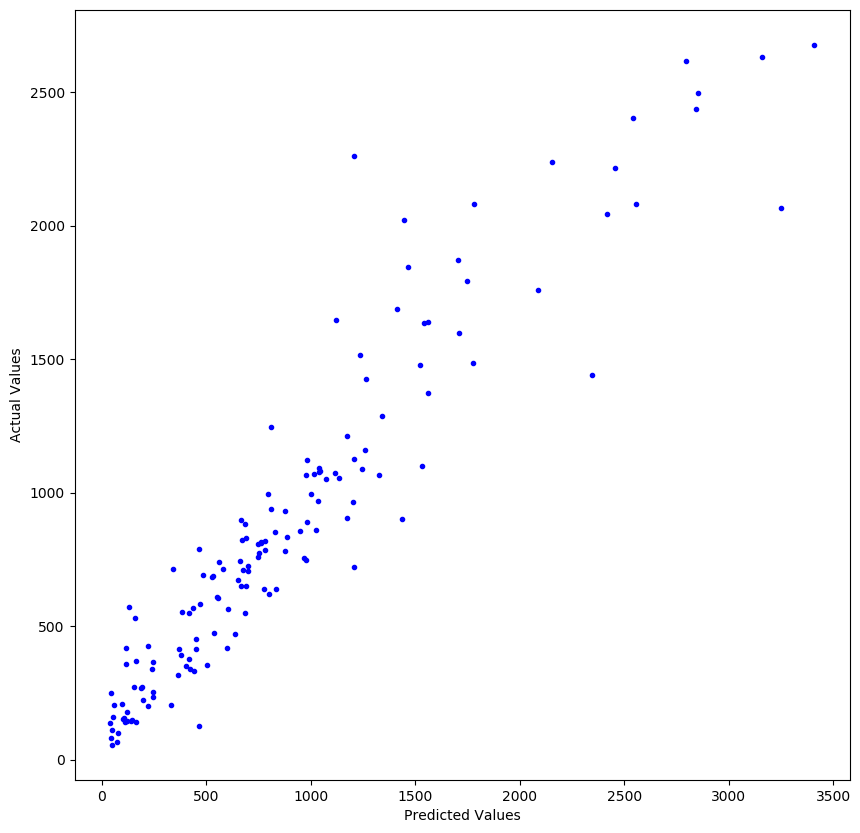

In [138]:
# Plot the actual values vs predicted values
plt.figure(figsize = (10, 10))
plt.plot(y_actual, y_predict, ".", color = 'b')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')